In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter



In [2]:
path = '/Users/johannemehren/filer/'
gpsro = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')

ds = xr.open_dataset(path + 'gridfile_test.nc')
ds2 = xr.open_dataset(path + 'erai_regrid_5x5.nc')

In [3]:
erai_grid = ds2.sel(lat=slice(-20,20),time=slice('2007-01-01', '2018-12-31'))
erai_grid_mon = erai_grid.groupby('time.month').mean(dim='time')

era5_grid = ds.sel(lat=slice(-20,20))
era5_grid_mon = era5_grid.groupby('time.month').mean(dim='time')


gpsro_trop = gpsro.sel(lat=slice(-20,20))
gpsro_mm = gpsro_trop.resample(time='M').mean()
gpsro_mon = gpsro_mm.groupby('time.month').mean(dim='time')


/Users/johannemehren/opt/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


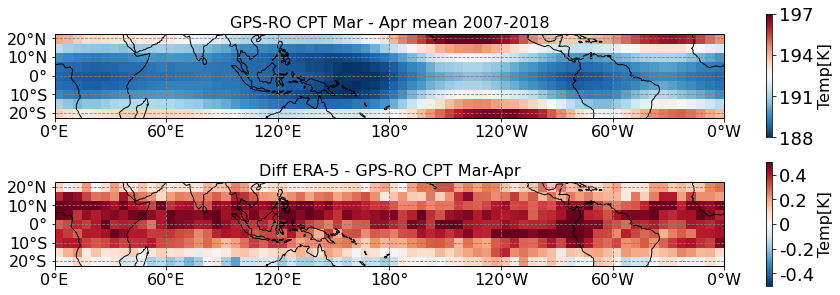

In [22]:
ds1 = gpsro_mon.CP_T[2:4,:,:]
ds11 = ds1.mean(axis=0)
tl1 = 'GPS-RO CPT Mar - Apr mean 2007-2018'
ds2 = era5_grid_mon.ctpt[2:4,:,:]
ds22 = ds2.mean(axis=0) - ds11
tl2 = 'Diff ERA-5 - GPS-RO CPT Mar-Apr'

vmin = -0.5
vmax = 0.5
mi = 188
ma  = 197

label = "Temp[K]"

k = enso_maxmin(ds11, tl1, ds22, tl2,mi, ma, vmin, vmax, label)
#k.savefig('lat-lon_gpsro_era5_mar-apr.png', dpi = 800)

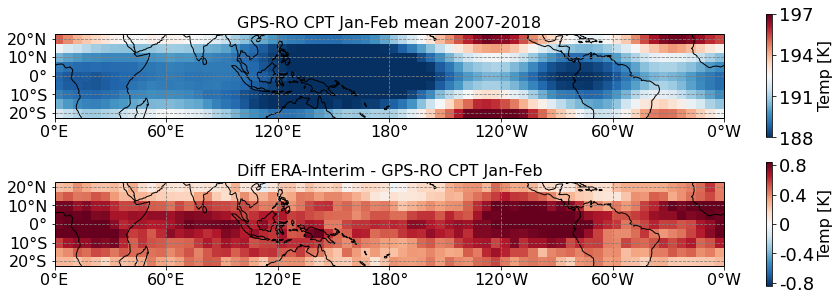

In [16]:
ds1 = gpsro_mon.CP_T[0:2,:,:]
ds11 = ds1.mean(axis=0)
tl1 = 'GPS-RO CPT Jan-Feb mean 2007-2018'
ds2 = erai_grid_mon.ctpt[0:2,:,:]
ds22 = ds2.mean(axis=0) - ds11
tl2 = 'Diff ERA-Interim - GPS-RO CPT Jan-Feb'

vmin = -0.84
vmax = 0.84

mi = 188
ma = 197

label = "Temp [K]"

k = enso_maxmin(ds11, tl1, ds22, tl2,mi, ma, vmin, vmax, label)
k.savefig('lat-lon_gpsro_erai_jan-feb.png', dpi = 800)

In [20]:
def enso_maxmin(ds1, tl1, ds2, tl2, mi, ma, vmin, vmax, label):
    proj = ccrs.PlateCarree(central_longitude = 180)
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5), subplot_kw={'projection':proj})
    xticks = [-120, -60, 0, 60, 120, 180, 0]
    yticks = [-20, -10, 0, 10, 20]
    cm = 'RdBu_r'
    font_size = 18

    #ax1 plot
    im1 = ds1.plot.pcolormesh(ax=ax1, cmap=cm,vmin=mi, vmax=ma,
                              transform=ccrs.PlateCarree(central_longitude=0),
                             add_colorbar=False)
    cb1 = plt.colorbar(im1,ax=ax1)
    cb1.set_label(label=label, fontsize=16)
    font_size = 18 # Adjust as appropriate.
    cb1.ax.tick_params(labelsize=font_size)
    cb1.set_ticks([188, 191, 194, 197])
    cb1.set_ticklabels([188, 191, 194, 197])
    ax1.coastlines()
    ax1.set_title(tl1, fontsize=16)
    
    ax1.set_xticks([0, 60, 120, 180, 240, 300, 359.9999999999], crs=ccrs.PlateCarree())
    ax1.set_yticks([-20, -10, 0, 10, 20], crs=ccrs.PlateCarree())

    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    ax1.grid(color='gray', linestyle='--')
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_ylabel("")
    ax1.set_xlabel("")



    # ax2 plot
    im2 = ds2.plot.pcolormesh(ax=ax2, cmap=cm, vmin = vmin, vmax=vmax,
                              transform=ccrs.PlateCarree(central_longitude=0),
                             add_colorbar=False)
    cb2 = plt.colorbar(im2, ax=ax2)
    cb2.set_label(label=label, fontsize=16)
    font_size = 18 # Adjust as appropriate.
    cb2.ax.tick_params(labelsize=font_size)
    cb2.set_ticks([-0.4,-0.2, 0,0.2 ,0.4])
    cb2.set_ticklabels([-0.4,-0.2, 0,0.2, 0.4])
    ax2.coastlines()
    ax2.set_title(tl2, fontsize=16)
    
    ax2.set_xticks([0, 60, 120, 180, 240, 300, 359.9999999999], crs=ccrs.PlateCarree())
    ax2.set_yticks([-20, -10, 0, 10, 20], crs=ccrs.PlateCarree())

    ax2.xaxis.set_major_formatter(lon_formatter)
    ax2.yaxis.set_major_formatter(lat_formatter)
    ax2.grid(color='gray', linestyle='--')
    ax2.tick_params(axis='both', which='major', labelsize=16)
    ax2.set_ylabel("")
    ax2.set_xlabel("")


    


    return f